In [1]:
# importing libraries
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import VarianceThreshold

import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.utils import resample
from sklearn.utils import shuffle
import warnings
warnings.filterwarnings('ignore')

#### Data Pre-processing

In [2]:
# Loading of the dataset 
dataset = pd.read_csv('Employee.csv')

In [3]:
#sampling random rows from the dataset
dataset.sample(5)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
350,Bachelors,2015,Pune,3,26,Female,No,4,1
1184,Masters,2015,New Delhi,3,28,Male,No,2,0
2133,Bachelors,2015,Pune,2,27,Female,Yes,5,1
4330,Bachelors,2014,New Delhi,3,36,Female,No,5,0
1220,Masters,2017,New Delhi,2,28,Male,No,3,0


In [4]:
#displaying the first 10 rows of the dataset
dataset.head(10)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
5,Bachelors,2016,Bangalore,3,22,Male,No,0,0
6,Bachelors,2015,New Delhi,3,38,Male,No,0,0
7,Bachelors,2016,Bangalore,3,34,Female,No,2,1
8,Bachelors,2016,Pune,3,23,Male,No,1,0
9,Masters,2017,New Delhi,2,37,Male,No,2,0


In [5]:
#displaying the last 5 rows of the dataset
dataset.tail(5)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0
4652,Bachelors,2015,Bangalore,3,33,Male,Yes,4,0


In [6]:
#check the the number of columns and rows in our dataset
dataset.shape

(4653, 9)

In [7]:
#to display the view some basic statistical details of the data in our dataset
dataset.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [8]:
#to display the view some basic statistical details of the data in our dataset
dataset.describe(include = 'all')

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
count,4653,4653.000000,4653,4653.000000,4653.000000,4653,4653,4653.000000,4653.000000
unique,3,NaN,3,NaN,NaN,2,2,NaN,NaN
top,Bachelors,NaN,Bangalore,NaN,NaN,Male,No,NaN,NaN
freq,3601,NaN,2228,NaN,NaN,2778,4175,NaN,NaN
mean,NaN,2015.062970,NaN,2.698259,29.393295,NaN,NaN,2.905652,0.343864
std,NaN,1.863377,NaN,0.561435,4.826087,NaN,NaN,1.558240,0.475047
min,NaN,2012.000000,NaN,1.000000,22.000000,NaN,NaN,0.000000,0.000000
25%,NaN,2013.000000,NaN,3.000000,26.000000,NaN,NaN,2.000000,0.000000
50%,NaN,2015.000000,NaN,3.000000,28.000000,NaN,NaN,3.000000,0.000000
75%,NaN,2017.000000,NaN,3.000000,32.000000,NaN,NaN,4.000000,1.000000


In [9]:
# Checking the dataset information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [10]:
#checking for null values
dataset.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [11]:
#checking for duplicated values
dataset.duplicated().sum()

1889

In [12]:
# checking for duplicated rows in the dataset
print('The number of duplicated rows in this datset is {}, amounting to about {}% of the entire dataset'
      .format(dataset.duplicated().sum(),(dataset.duplicated().sum()/len(dataset)*100.0).round(2)))

The number of duplicated rows in this datset is 1889, amounting to about 40.6% of the entire dataset


In [13]:
#dropping the duplicates in our datasets
dataset = dataset.drop_duplicates()

In [14]:
#check the the number of columns and rows in our dataset
dataset.shape

(2764, 9)

In [15]:
#finding out the unique values of Education Column
print(dataset['Education'].unique())

['Bachelors' 'Masters' 'PHD']


In [16]:
#finding out the unique values of Joining Year Column
print(dataset['JoiningYear'].unique())

[2017 2013 2014 2016 2015 2012 2018]


In [17]:
#finding out the unique values of City Column
print(dataset['City'].unique())

['Bangalore' 'Pune' 'New Delhi']


In [18]:
#finding out the unique values of Gender Column
print(dataset['Gender'].unique())

['Male' 'Female']


In [19]:
#finding out the unique values of EverBenched Column
print(dataset['EverBenched'].unique()) 

['No' 'Yes']


In [20]:
#finding out the unique values of PaymentTier Column
print(dataset['PaymentTier'].unique()) 

[3 1 2]


In [21]:
#finding out the unique values of LeaveOrNot Column
print(dataset['LeaveOrNot'].unique())

[0 1]


In [22]:
#counting the number of employees that left or not
dataset['LeaveOrNot'].value_counts()

LeaveOrNot
0    1676
1    1088
Name: count, dtype: int64

In [23]:
# distirbution of gender based on whether they left or not
leftornot = dataset.groupby(['Gender','LeaveOrNot'])[['LeaveOrNot']].size().unstack('LeaveOrNot')
leftornot

LeaveOrNot,0,1
Gender,,
Female,621,614
Male,1055,474


### Data visualization

Text(0.5, 1.0, 'Employee Leave or Not')

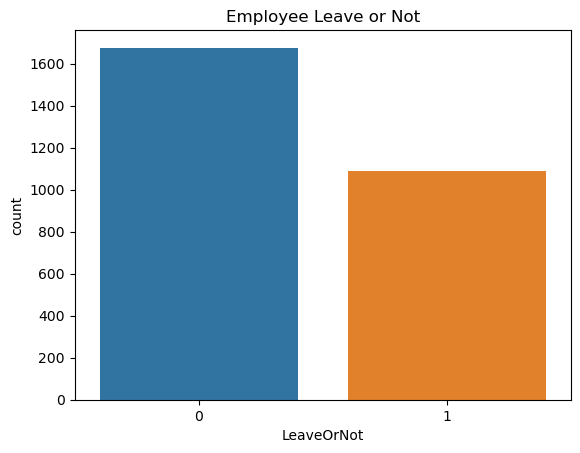

In [24]:
#ploting to have a clear representation of the data before working on the imbalance
sns.countplot(dataset, x="LeaveOrNot")
plt.title("Employee Leave or Not")


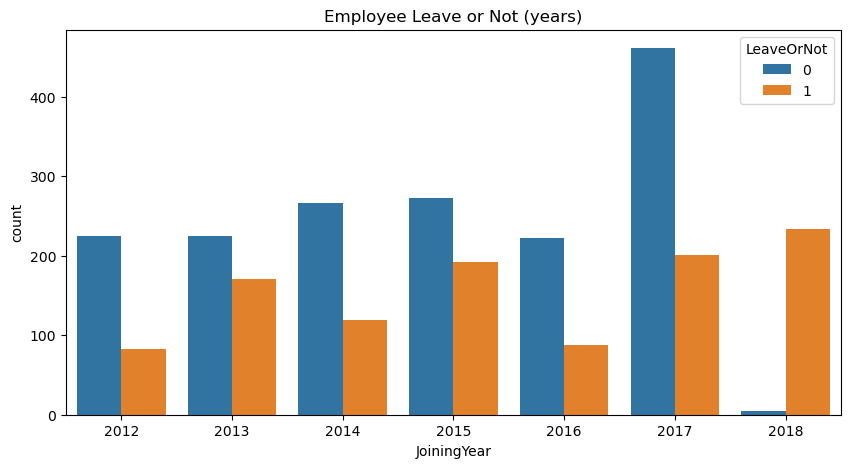

In [25]:
plt.figure(figsize = (10,5))
plt.title("Employee Leave or Not (years)")
sns.countplot(x="JoiningYear", hue="LeaveOrNot", data = dataset)

plt.show()

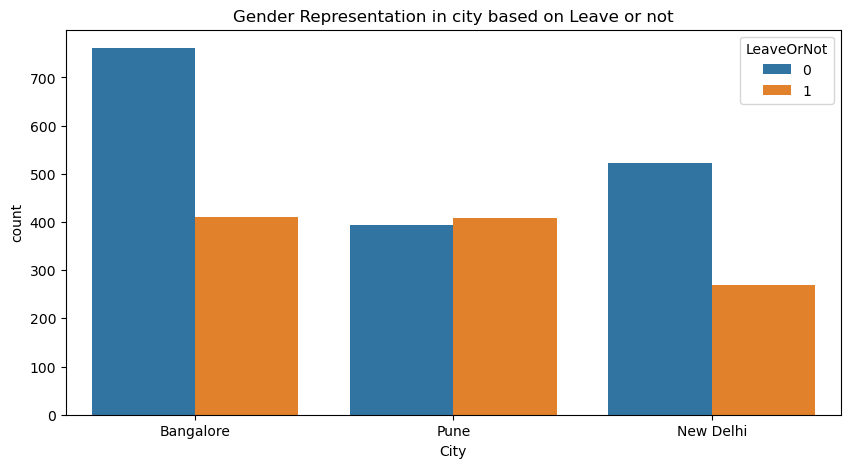

In [26]:
plt.figure(figsize = (10,5))
plt.title("Gender Representation in city based on Leave or not")
sns.countplot(x="City", hue="LeaveOrNot", data = dataset)

plt.show()

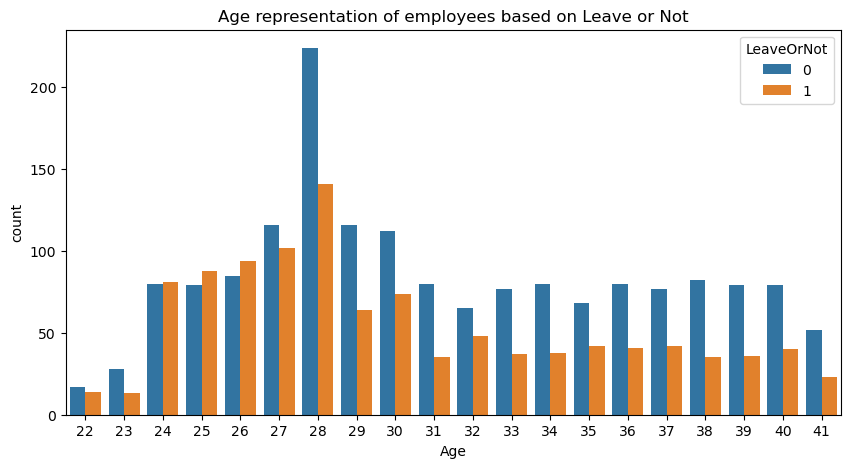

In [27]:
plt.figure(figsize = (10,5))
plt.title("Age representation of employees based on Leave or Not")
sns.countplot(x="Age", hue="LeaveOrNot", data = dataset)

plt.show()

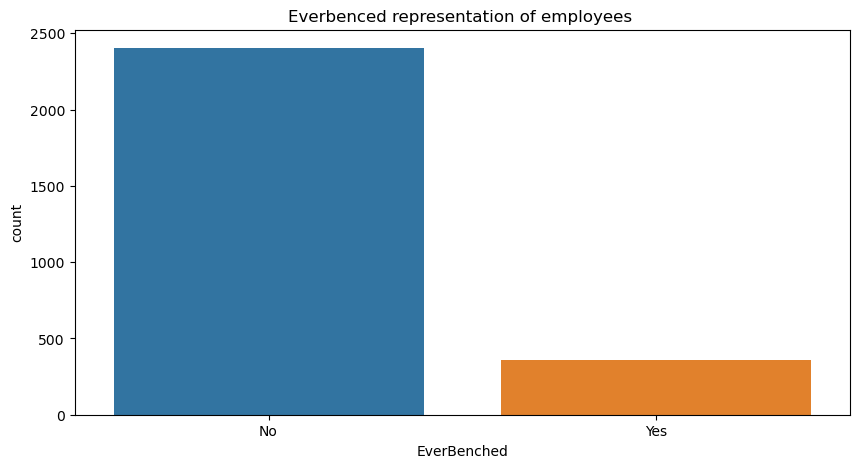

In [28]:
plt.figure(figsize = (10,5))
plt.title("Everbenced representation of employees ")
sns.countplot(x="EverBenched", data = dataset)

plt.show()

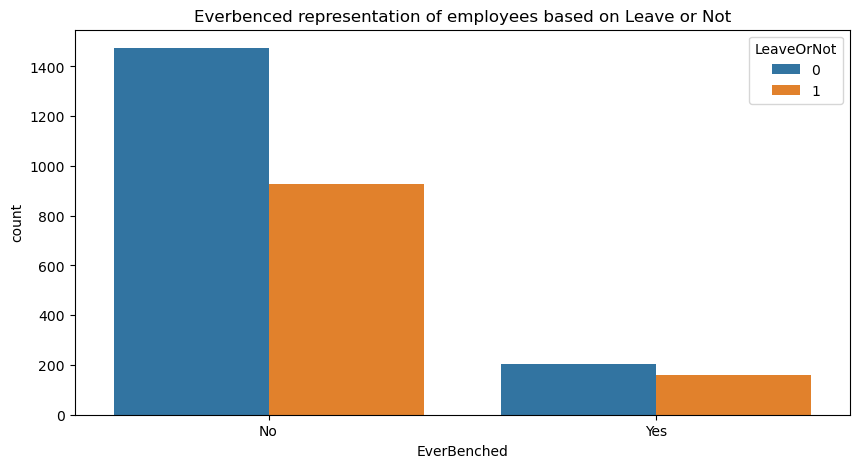

In [29]:
plt.figure(figsize = (10,5))
plt.title("Everbenced representation of employees based on Leave or Not")
sns.countplot(x="EverBenched", hue="LeaveOrNot", data = dataset)

plt.show()

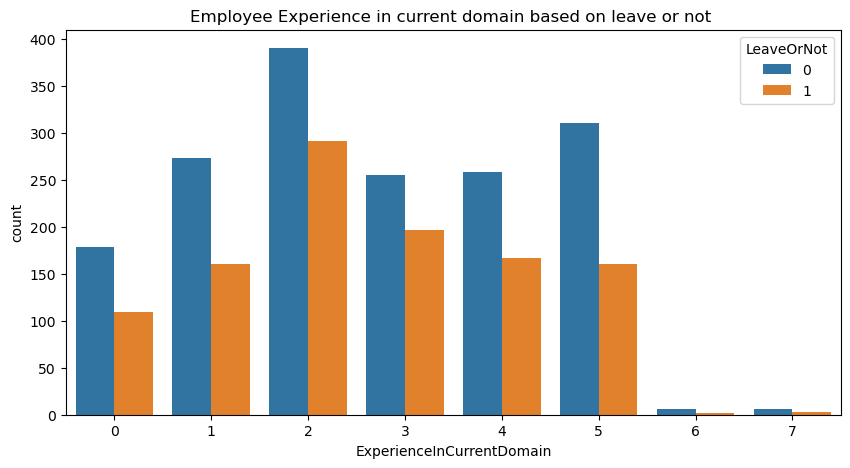

In [30]:
plt.figure(figsize = (10,5))
plt.title("Employee Experience in current domain based on leave or not ")
sns.countplot(x="ExperienceInCurrentDomain", hue="LeaveOrNot", data = dataset)

plt.show()

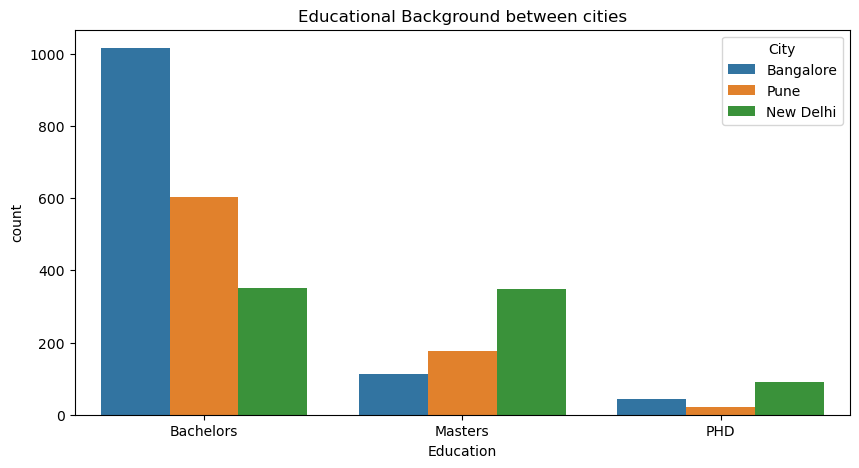

In [31]:
plt.figure(figsize = (10,5))
plt.title("Educational Background between cities")
sns.countplot(x="Education", hue="City", data = dataset)

plt.show()

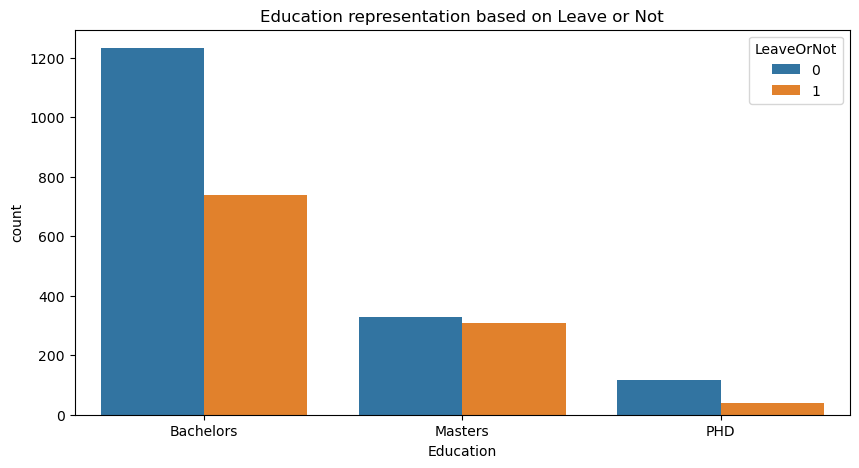

In [32]:
plt.figure(figsize = (10,5))
plt.title("Education representation based on Leave or Not")
sns.countplot(x="Education", hue="LeaveOrNot", data = dataset)

plt.show()

In [33]:
#Encoding the unique values of my columns to 0,1,2
le=LabelEncoder()
dataset["Education"]=le.fit_transform(dataset["Education"])
dataset["City"]=le.fit_transform(dataset["City"])
dataset["Gender"]=le.fit_transform(dataset["Gender"])
dataset["EverBenched"]=le.fit_transform(dataset["EverBenched"])
dataset.head(3)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,0,3,34,1,0,0,0
1,0,2013,2,1,28,0,0,3,1
2,0,2014,1,3,38,0,0,2,0


In [34]:
#colors = ("green","grey","green","grey","green","grey","green","grey","green")
 
#for i in  range(len(columns)-1):
   # plt.figure(figsize=(5,3))
   # sns.boxplot(dataset, x=cleaned_data["LeaveOrNot"], y=cleaned_data[columns[i]], color = colors[i])
  #  plt.title(f"{columns[i]}  vs LeaveOrNot")
 #   plt.show()

In [35]:
# The correlation matrix table
dataset.corr()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
Education,1.000000,0.113858,0.111153,-0.071380,-0.107324,0.025057,-0.084810,0.043842,0.019661
JoiningYear,0.113858,1.000000,0.038988,-0.053823,0.024445,0.007990,0.042903,-0.031228,0.150650
City,0.111153,0.038988,1.000000,-0.209064,-0.071884,-0.098009,-0.036916,0.002805,0.127548
PaymentTier,-0.071380,-0.053823,-0.209064,1.000000,0.067514,0.172051,0.057464,-0.004602,-0.119891
Age,-0.107324,0.024445,-0.071884,0.067514,1.000000,0.037884,-0.078617,-0.053276,-0.114943
Gender,0.025057,0.007990,-0.098009,0.172051,0.037884,1.000000,0.052479,-0.019080,-0.190457
EverBenched,-0.084810,0.042903,-0.036916,0.057464,-0.078617,0.052479,1.000000,0.002259,0.037137
ExperienceInCurrentDomain,0.043842,-0.031228,0.002805,-0.004602,-0.053276,-0.019080,0.002259,1.000000,-0.021181
LeaveOrNot,0.019661,0.150650,0.127548,-0.119891,-0.114943,-0.190457,0.037137,-0.021181,1.000000


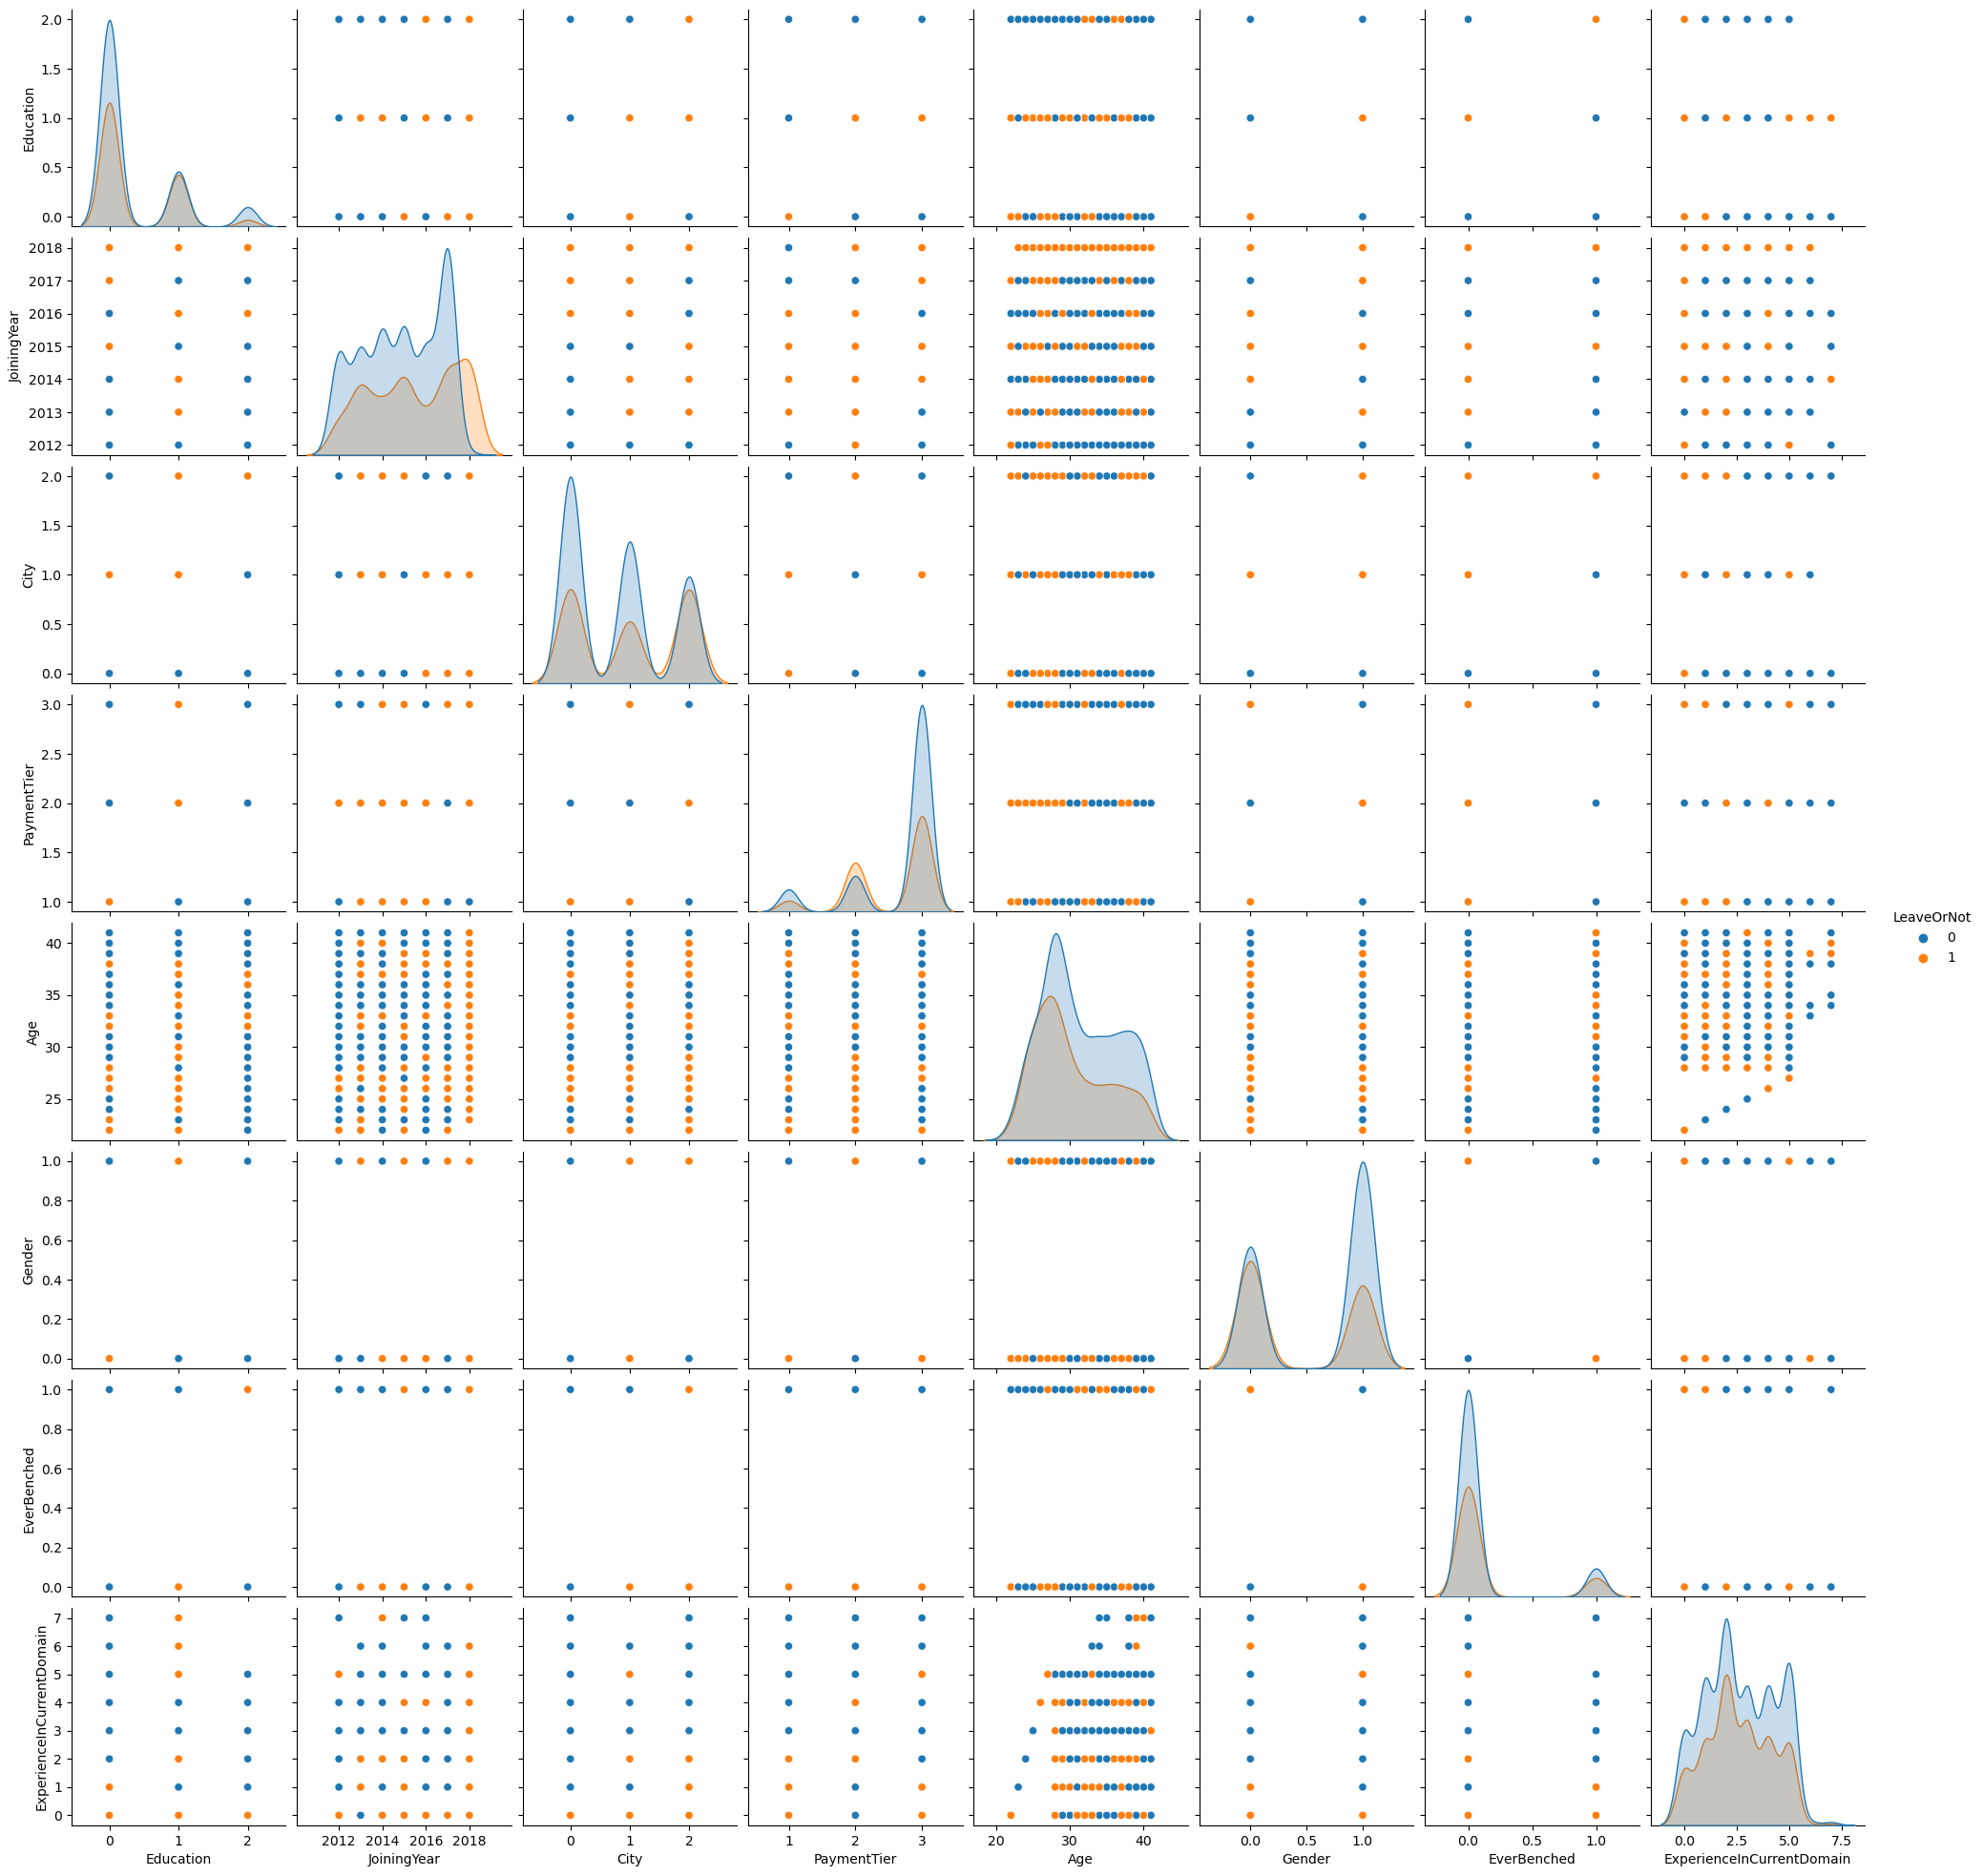

In [36]:
sns.pairplot(data=dataset,hue='LeaveOrNot')

<Axes: >

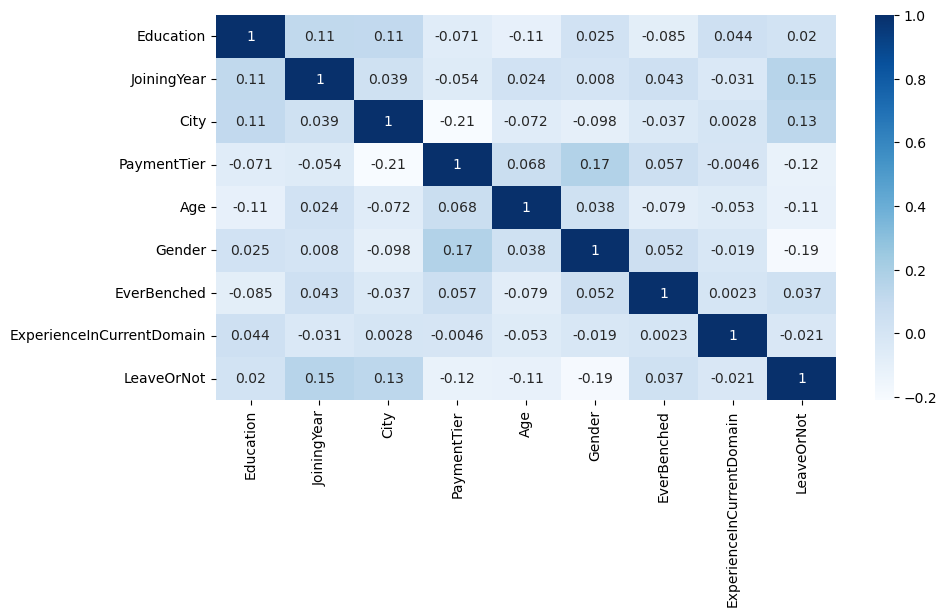

In [37]:
import seaborn as sb
plt.figure(figsize = (10,5))
corr = dataset.corr()
sns.heatmap(corr, cmap="Blues", annot=True)

### KNN Classification Model

In [38]:
dataset.LeaveOrNot.value_counts()

LeaveOrNot
0    1676
1    1088
Name: count, dtype: int64

In [39]:
Leave  = dataset[dataset['LeaveOrNot']==0]   
Not_Leave = dataset[dataset['LeaveOrNot']==1]  

new_df = resample(Not_Leave, replace = True, n_samples = 1676) 
new_dataset = pd.concat([Leave, new_df])

new_dataset = shuffle(new_dataset)

new_dataset.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
2092,0,2016,0,3,27,0,1,5,0
4518,0,2013,2,3,31,1,0,2,0
3735,0,2012,2,2,36,0,0,5,1
4550,2,2014,0,3,23,1,0,1,0
2194,0,2014,0,3,30,1,0,1,0


In [40]:
x = new_dataset.drop(["LeaveOrNot"], axis=1)
y = new_dataset["LeaveOrNot"]

In [41]:
y.value_counts()

LeaveOrNot
0    1676
1    1676
Name: count, dtype: int64

<Axes: xlabel='LeaveOrNot', ylabel='count'>

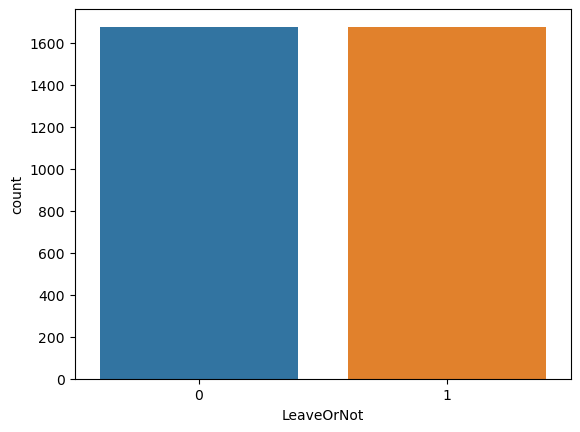

In [42]:
sns.countplot(new_dataset, x="LeaveOrNot")

In [43]:
# Splitting the dataset into the trainning set and the Test set:

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)


In [44]:
variance_selector = VarianceThreshold(threshold=0)

x_train_fs = variance_selector.fit_transform(x_train) 
x_test_fs = variance_selector.transform(x_test)

In [45]:
# checking for the variability threshold 
print(f"""{x_train.shape[1]-x_train_fs.shape[1]} features have been removed, {x_train_fs.shape[1]} features remain""")

0 features have been removed, 8 features remain


In [46]:
# Scaling features:using the fit_tranform

sc = StandardScaler()

x_train_s = sc.fit_transform(x_train)

x_test_s = sc.transform(x_test)

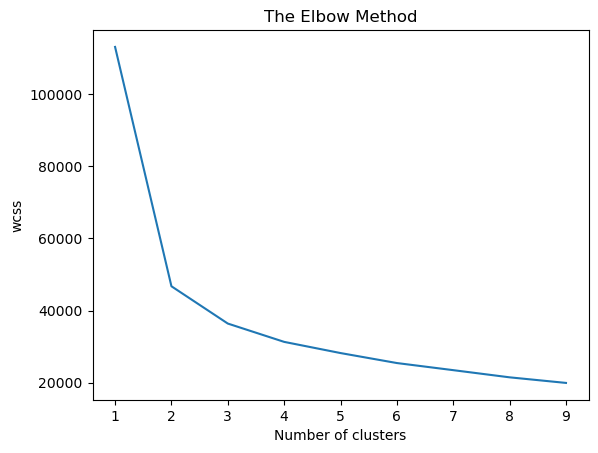

In [47]:
# find the optimal number of cluster using the elbow method

wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [48]:
# fitting k-NN to the training set
k = 2
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski', p = 2)
classifier.fit(x_train_s, y_train)

KNeighborsClassifier(n_neighbors=2)

In [49]:
# predicting the test set results

y_pred = classifier.predict(x_test_s)
print(y_pred)

[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 0 1 0 0 0 1 1
 1 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 1 1 1 1 0 1 0 1 0
 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1
 0 1 1 1 0 0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1
 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 1 1 1 1 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0
 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0
 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1
 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0
 0 0 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 0 1 1 1 1 0 0 1 0 0 1 0 0 0 0 1 0 0
 1 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1
 1 1 1 1 1 0 1 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1
 0 1 1 0 1 0 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 1 0 0 0 0 0 0 1 1 0 

In [50]:
print(y_test)

3226    1
769     1
408     0
3972    0
1642    0
       ..
3286    1
3001    0
4066    1
545     0
3004    0
Name: LeaveOrNot, Length: 671, dtype: int64


In [51]:
acc = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {metrics.accuracy_score(y_test,y_pred)*100:.2f}%") 

#print('accuracy:%.2f\n\n'%(acc))

cm = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm,'\n\n')

print('-----------------------------------------------------')

result = metrics.classification_report(y_test,y_pred)
print('Classification Report:\n')

print(result)



Accuracy Score: 74.52%
Confusion Matrix:
[[289  56]
 [115 211]] 


-----------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.72      0.84      0.77       345
           1       0.79      0.65      0.71       326

    accuracy                           0.75       671
   macro avg       0.75      0.74      0.74       671
weighted avg       0.75      0.75      0.74       671



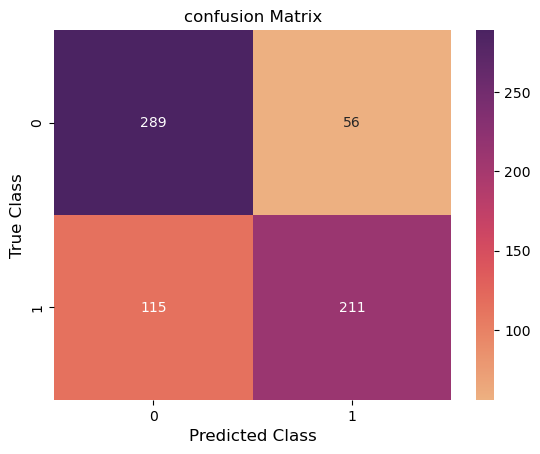

In [52]:
ax = sns.heatmap(cm, cmap = 'flare', annot = True, fmt = 'd')

plt.title("confusion Matrix", fontsize = 12)
plt.xlabel("Predicted Class", fontsize = 12)
plt.ylabel("True Class", fontsize = 12)
plt.show()